# Trading Bot

Welcome to our trading bot for Dow Jones stocks. This bot helps you to earn a lot of money.  
Just follow the instructions. 

### Before we can start, we first have to import a few libraries

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from own_jupyter_controls import dropdown_widget, generate_file_path_for_stock_data, network_architecture_widget
from stock_pred import train_bot
from trading import trading
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Selecting stock
Please select the ticker symbol of the Dow Jones stock your interested in.
First run the cell. Then select the ticker symbol from the dropdown-menu, then run the next Cell.

In [2]:
widget = dropdown_widget()
display(widget)

interactive(children=(Dropdown(description='Symbol', options=('MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO'…

In [150]:
file_path = generate_file_path_for_stock_data(widget.kwargs['x'])
print("The file path to your data is '" + file_path + "'")

The file path to your data is 'data/daily_NKE.csv'


## Predicting stock
Next we train a neural network to learn to predict the course development of our selected stock. 
<br>
<br>
But first we have to select the hyperparameters of our network!  

In [151]:
# Network hyperparameters
two_lstm_layers=False
number_of_neurons_lstm=50 # Only use integers
two_layers_second_branch=False
number_of_neurons_second_branch=20 # Only use integers
dropout_rate=0.2

# Feature parameters
history_points = 50 # Do not set below 50; Only use integers
s_and_p_500 = False 
ma7 = True
ma21 = True 
ma_his_window = True
ema12 = True 
ema26 = True 
mac = True 
ten_day_momentum = True
upper_bands = True 
lower_bands = True
volatilty_index_feature = True
fourier = 0 # 0 if you don't want to use the feature and only use integers
dollar_currency_index = False

# Training parameters
number_of_epochs = 50

In [152]:
error, values_original, values_predicted, ohlcv_test, tech_ind_test, model, y_normaliser = train_bot(file_path=file_path, 
                                                                                                     history_points=history_points, 
                                                                                                     number_of_epochs=number_of_epochs, 
                                                                                                     two_lstm_layers=two_lstm_layers, 
                                                                                                     number_of_neurons_lstm=number_of_neurons_lstm,
                                                                                                     two_layers_second_branch=two_layers_second_branch, 
                                                                                                     number_of_neurons_second_branch=number_of_neurons_second_branch, 
                                                                                                     dropout_rate=dropout_rate, 
                                                                                                     s_and_p_500=s_and_p_500, 
                                                                                                     ma7=ma7, 
                                                                                                     ma21=ma21, 
                                                                                                     ma_his_window=ma_his_window, 
                                                                                                     ema12=ema12, 
                                                                                                     ema26=ema26, 
                                                                                                     mac=mac, 
                                                                                                     ten_day_momentum=ten_day_momentum,
                                                                                                     upper_bands=upper_bands, 
                                                                                                     lower_bands=lower_bands,
                                                                                                     volatilty_index_feature=volatilty_index_feature,
                                                                                                     fourier=fourier,
                                                                                                     dollar_currency_index=dollar_currency_index)

Train on 4032 samples, validate on 448 samples
Epoch 1/50
 - 6s - loss: 0.0189 - val_loss: 3.2308e-04
Epoch 2/50
 - 5s - loss: 0.0029 - val_loss: 4.6167e-04
Epoch 3/50
 - 5s - loss: 0.0023 - val_loss: 8.0309e-04
Epoch 4/50
 - 5s - loss: 0.0020 - val_loss: 4.9392e-04
Epoch 5/50
 - 5s - loss: 0.0016 - val_loss: 4.5376e-04
Epoch 6/50
 - 6s - loss: 0.0015 - val_loss: 3.3252e-04
Epoch 7/50
 - 4s - loss: 0.0013 - val_loss: 1.4042e-04
Epoch 8/50
 - 4s - loss: 0.0013 - val_loss: 1.2895e-04
Epoch 9/50
 - 4s - loss: 0.0012 - val_loss: 1.3091e-04
Epoch 10/50
 - 4s - loss: 0.0011 - val_loss: 1.3160e-04
Epoch 11/50
 - 4s - loss: 9.9442e-04 - val_loss: 1.7109e-04
Epoch 12/50
 - 4s - loss: 0.0010 - val_loss: 1.2645e-04
Epoch 13/50
 - 4s - loss: 9.5860e-04 - val_loss: 1.1644e-04
Epoch 14/50
 - 4s - loss: 9.4348e-04 - val_loss: 1.4654e-04
Epoch 15/50
 - 4s - loss: 8.7361e-04 - val_loss: 2.0919e-04
Epoch 16/50
 - 4s - loss: 8.2649e-04 - val_loss: 1.2081e-04
Epoch 17/50
 - 4s - loss: 7.9167e-04 - val_los

### The error of our network

In [153]:
print("The Mean-squared error of our network on the test set is " + "{:10.3f}".format(error))

The Mean-squared error of our network on the test set is      2.672


#### Plot of our network's performance on the test set

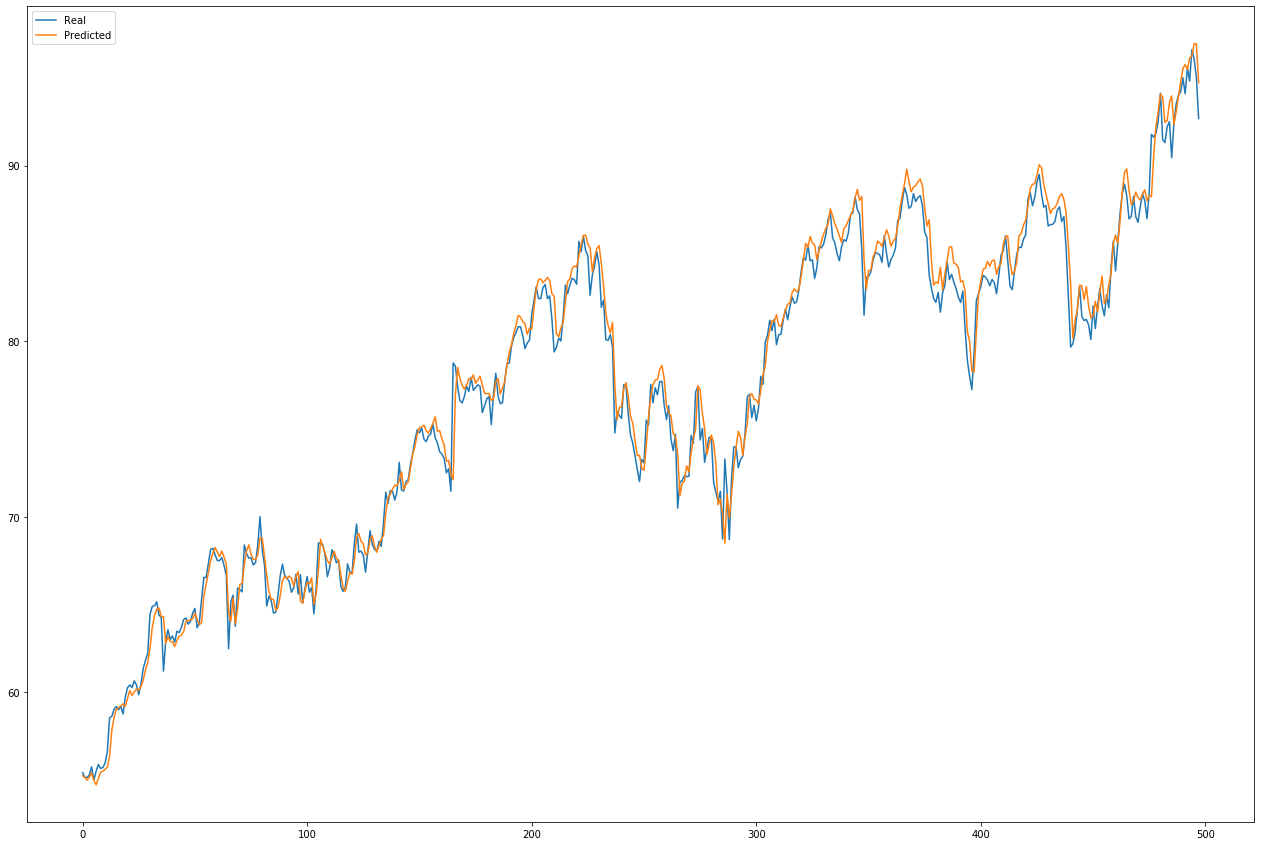

In [154]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
plt.legend(['Real', 'Predicted'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()

## Trading stock
With the predictions working we can trade stock. Let's see how our bot would have performed on the test set when trading stock.  
</br>  
</br>
If you want to see the results for a different purchase amount please change the variable below.   
</br>  
</br>
If the last trade(s) is/are a buy order, they do not get executed, in order to have compare all the returns.

In [165]:
purchase_amt = 100 # Select here your purchase amount
trading_cost = 1 # Select your trading cost
buys, sells = trading(ohlcv_test, tech_ind_test, y_normaliser, model, purchase_amt, trading_cost)

The numbers of buys and sells that our bot would have taken
buys: 67
sells: 8
The money our bot would have earned
earnings: $381.28555398719936


#### Let's plot our bot's trading patterns

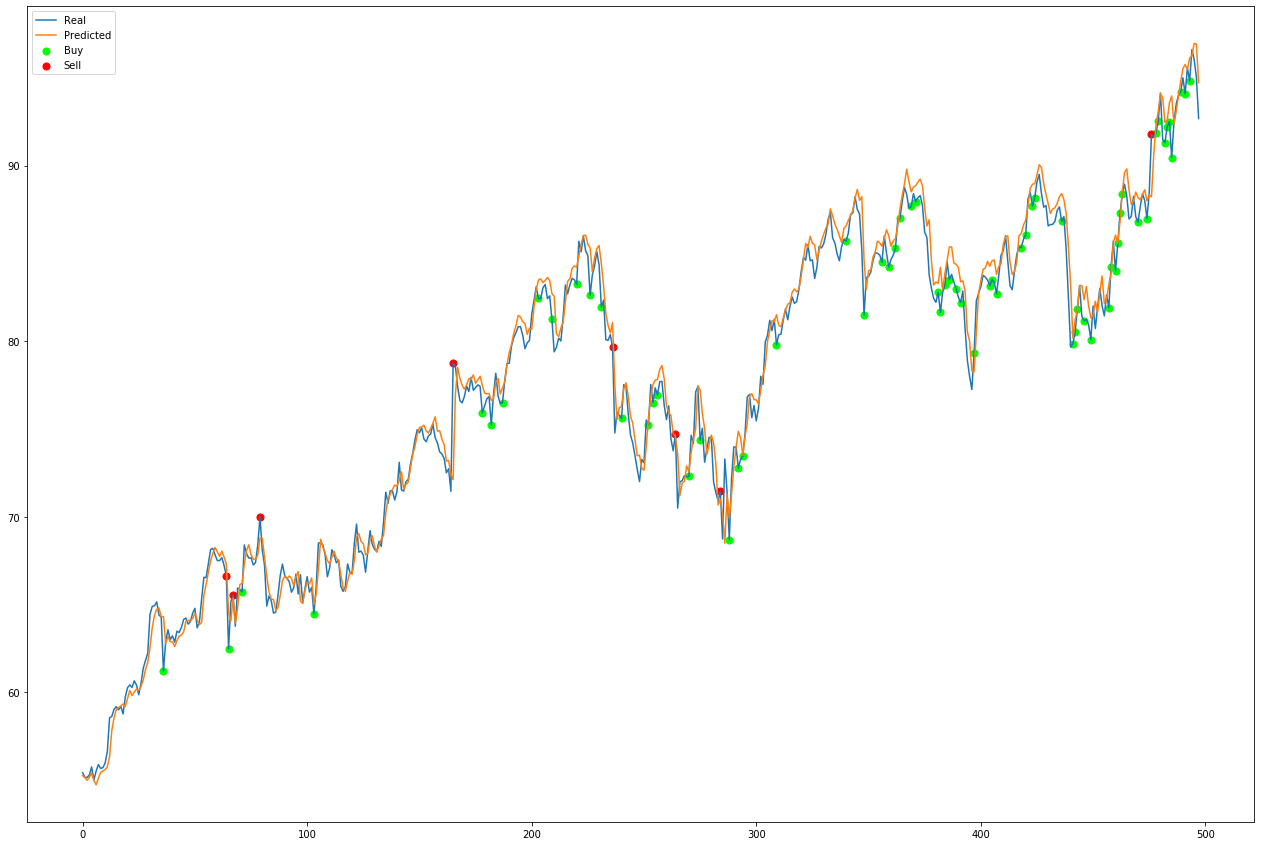

In [166]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
if len(buys) > 0:
    plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00', s=50)
if len(sells) > 0:
    plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000', s=50)
# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')
plt.legend(['Real', 'Predicted', 'Buy', 'Sell'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()